![](walmart1.png)


# Business Case: Walmart - Confidence Interval and CLT


---------------------------------------------------------------------------------------------------------------------------

**About Walmart -**

    Walmart is an American multinational retail corporation that operates a chain of supercenters, 
    
    discount departmental stores, and grocery stores from the United States. 
    
    Walmart has more than 100 million customers worldwide.
    
    

---------------------------------------------------------------------------------------------------------------------------

**Business Problem -**

        The Management team at Walmart Inc. wants to analyze the customer purchase behavior 
        
        (specifically, purchase amount) against the customer’s gender 
        
        and the various other factors to help the business make better decisions. 




---------------------------------------------------------------------------------------------------------------------------

_**Importing Python Libraries necessary while carrying out data exploration & visualisation**_ -
    
    

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import norm, binom, geom
import warnings
warnings.filterwarnings('ignore')


---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

**Upload & read csv file in pandas dataframe -**



In [2]:
walmart = pd.read_csv("walmart.txt", sep = ",")


---------------------------------------------------------------------------------------------------------------------------

_**Inspecting Dataset & Analyzing Different Matrics**_ -
    

In [6]:
walmart.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [7]:
walmart.tail()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


---------------------------------------------------------------------------------------------------------------------------

_**Observations on**_ -
    
        1) shape of data
        
        2) data types
        
        3) Statistical summary
        
        

In [8]:
walmart.shape


(550068, 10)

In [9]:
walmart.columns


Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [102]:
walmart.nunique()


User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [10]:
walmart.size


5500680

In [11]:
walmart.dtypes


User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [12]:
walmart.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [13]:
walmart.describe()


,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [14]:
walmart.describe(include = object)


,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


---------------------------------------------------------------------------------------------------------------------------

**Data Cleaning -**

    Check for Missing values & Duplicates.
    



In [20]:
walmart.isnull().sum().sort_values(ascending = True)


User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [19]:
walmart[walmart.duplicated()]


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


**Comment -**

    No null values & duplicate values present in dataset
    
    

---------------------------------------------------------------------------------------------------------------------------

**Non Graphical Analysis -**



In [33]:
walmart.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


---------------------------------------------------------------------------------------------------------------------------

In [34]:
# user_id wise unique value & counts -
walmart["User_ID"].unique()


array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529],
      dtype=int64)

In [35]:
walmart["User_ID"].nunique()


5891

In [36]:
walmart["User_ID"].value_counts()


1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

**Comments -**

    1) we have 5891 entries of User_ID.

    2) Top three User_Id are 1001680, 1004277, 1001941.
    
    
    

---------------------------------------------------------------------------------------------------------------------------

In [37]:
# Product_id wise unique value & counts -
walmart["Product_ID"].unique()


array(['P00069042', 'P00248942', 'P00087842', ..., 'P00370293',
       'P00371644', 'P00370853'], dtype=object)

In [38]:
walmart["Product_ID"].nunique()


3631

In [39]:
walmart["Product_ID"].value_counts()


P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

**Comments -**

    1) we have 3631 Product_ID.

    2) Top three Product_Id are P00265242, P00025442, P00220742.
    
    

---------------------------------------------------------------------------------------------------------------------------

In [40]:
# Gender wise unique value & counts -
walmart["Gender"].unique()


array(['F', 'M'], dtype=object)

In [41]:
walmart["Gender"].value_counts(normalize = True).round(2) * 100


M    75.0
F    25.0
Name: Gender, dtype: float64

**Comments -**

    1) we have 75% male Customers & 25% female Customers.
    
    

---------------------------------------------------------------------------------------------------------------------------

In [42]:
# Age wise unique value & counts -
walmart["Age"].unique()


array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [43]:
walmart["Age"].value_counts(normalize = True).round(2) * 100


26-35    40.0
36-45    20.0
18-25    18.0
46-50     8.0
51-55     7.0
55+       4.0
0-17      3.0
Name: Age, dtype: float64

**Comments -**

    1) we have customers in the age groups from 0-55+.
    
    2) Customers in the age group 26-35 are nearly about 40% followed by 36-45 (20%).



---------------------------------------------------------------------------------------------------------------------------

In [44]:
# Occupation wise unique value & counts -
walmart["Occupation"].unique()


array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [45]:
walmart["Occupation"].value_counts(normalize = True).round(2) * 100


4     13.0
0     13.0
7     11.0
1      9.0
17     7.0
20     6.0
12     6.0
14     5.0
2      5.0
16     5.0
6      4.0
3      3.0
10     2.0
5      2.0
15     2.0
11     2.0
19     2.0
13     1.0
18     1.0
9      1.0
8      0.0
Name: Occupation, dtype: float64

**Comments -**

    1) we have occupation starting from 0 to 20 years of experience.
    
    2) Occupation with years of experience 4, 0 & 7 are more in numbers.



---------------------------------------------------------------------------------------------------------------------------

In [46]:
# City wise unique value & counts -
walmart["City_Category"].unique()


array(['A', 'C', 'B'], dtype=object)

In [47]:
walmart["City_Category"].value_counts(normalize = True).round(2) * 100


B    42.0
C    31.0
A    27.0
Name: City_Category, dtype: float64

**Comments -**

    1) we have three categories of city i.e. 'A', 'B', 'C'.
    
    2) Customers from 'City B' are the more in numbers (i.e. 42%) followed by 'City A'(31%).



---------------------------------------------------------------------------------------------------------------------------

In [48]:
# Current stay wise unique value & counts -
walmart["Stay_In_Current_City_Years"].unique()


array(['2', '4+', '3', '1', '0'], dtype=object)

In [49]:
walmart["Stay_In_Current_City_Years"].value_counts(normalize = True).round(2) * 100


1     35.0
2     19.0
3     17.0
4+    15.0
0     14.0
Name: Stay_In_Current_City_Years, dtype: float64

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

**Comments -**

    1) we have five types of current stay in years that are 0, 1, 2, 3, 4+
    
    2) Out of five customers who are staying for one year are 35% followed by 2 years(19%) & 3 Years(17%).



---------------------------------------------------------------------------------------------------------------------------

In [50]:
# Marital Status wise unique value & counts -
walmart["Marital_Status"].unique()


array([0, 1], dtype=int64)

In [51]:
walmart["Marital_Status"].value_counts(normalize = True).round(2) * 100


0    59.0
1    41.0
Name: Marital_Status, dtype: float64

**Comments -**

    1) we have two categories of marital status i.e '0' means single & '1' means married.
    
    2) single cutomers(59%) are more in numbers as compared to married people(41%).



---------------------------------------------------------------------------------------------------------------------------

In [52]:
# Product Category wise unique value & counts -
walmart["Product_Category"].unique()


array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [54]:
walmart["Product_Category"].nunique()


20

In [53]:
walmart["Product_Category"].value_counts(normalize = True).round(2) * 100


5     27.0
1     26.0
8     21.0
11     4.0
2      4.0
6      4.0
3      4.0
4      2.0
16     2.0
15     1.0
13     1.0
10     1.0
12     1.0
7      1.0
18     1.0
20     0.0
19     0.0
14     0.0
17     0.0
9      0.0
Name: Product_Category, dtype: float64

**Comments -**

    1) we have 20 different product categories.
    
    2) Product Category 5, 1 & 8 are the top three amongst of all.



---------------------------------------------------------------------------------------------------------------------------

In [55]:
# Purchase wise unique value & counts -
walmart["Purchase"].unique()


array([ 8370, 15200,  1422, ...,   135,   123,   613], dtype=int64)

In [56]:
walmart["Purchase"].nunique()


18105

In [58]:
walmart["Purchase"].value_counts()


7011     191
7193     188
6855     187
6891     184
7012     183
        ... 
23491      1
18345      1
3372       1
855        1
21489      1
Name: Purchase, Length: 18105, dtype: int64

**Comments -**

    1) Purchase count is nearly maximum for range between 6k-8k.
    
    

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

**Visual Analysis -**



In [47]:
walmart.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


---------------------------------------------------------------------------------------------------------------------------

**A. Univariate Analysis -**


**1. Count Plots -**


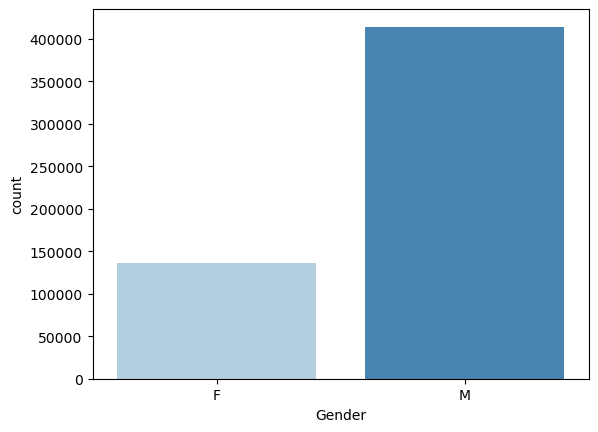

In [5]:
# Gender countplot
sns.countplot(x = "Gender", data = walmart, palette = "Blues")
plt.show()


**Comment -**

    From above graph male customer are more in number as compared to females.
    

---------------------------------------------------------------------------------------------------------------------------

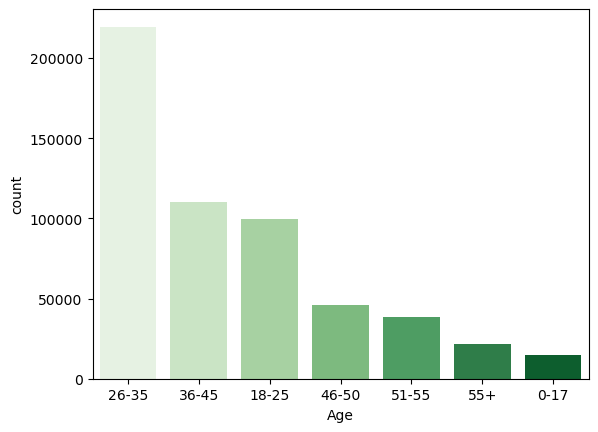

In [33]:
# Age countplot
sns.countplot(x = "Age", order = walmart["Age"].value_counts().index,
              data = walmart, palette = "Greens")
plt.show()


**Comment -**

    From above graph we can easily conclude that customer having age between 26-35 are most amongst all.



---------------------------------------------------------------------------------------------------------------------------

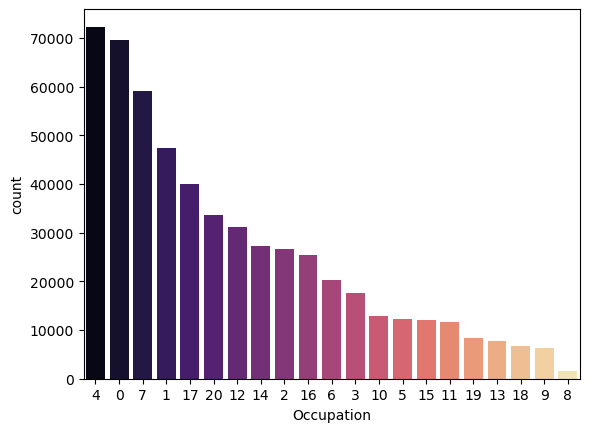

In [32]:
# Occupation countplot
sns.countplot(x = "Occupation", order = walmart["Occupation"].value_counts().index,
              data = walmart, palette = "magma")
plt.show()


---------------------------------------------------------------------------------------------------------------------------

**Comment -**

    Occupation with years of experience 4, 0 & 7 have significant count with respect to others.



---------------------------------------------------------------------------------------------------------------------------

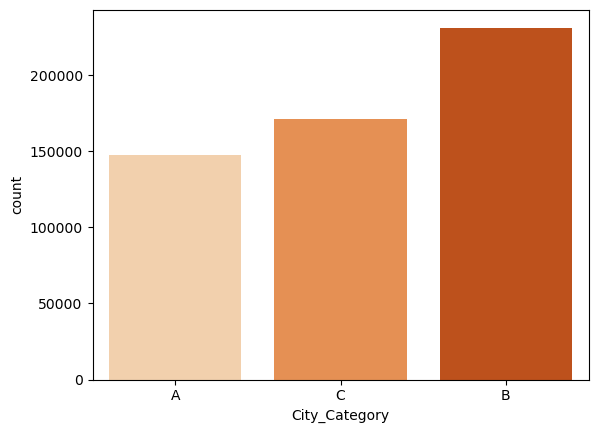

In [8]:
# City Category countplot
sns.countplot(x = "City_Category", data = walmart, palette = "Oranges")
plt.show()


**Comment -**

    City Category 'B' has most number of customers followed by 'C' and 'A'.



---------------------------------------------------------------------------------------------------------------------------

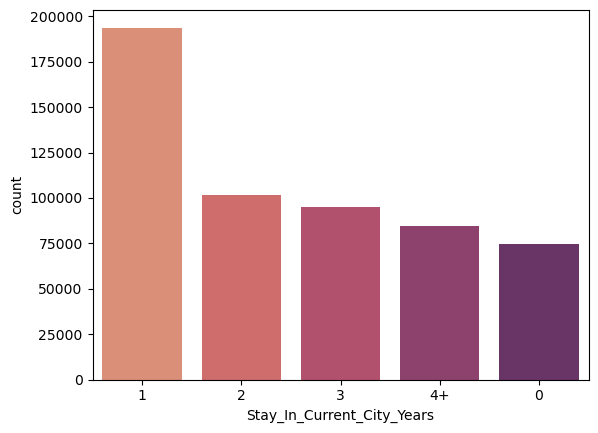

In [34]:
# Current city stay countplot
sns.countplot(x = "Stay_In_Current_City_Years", order = walmart["Stay_In_Current_City_Years"].value_counts().index,
              data = walmart, palette = "flare")
plt.show()


**Comment -**

    Customer who are living for 1 year in current city are most amongst all.



---------------------------------------------------------------------------------------------------------------------------

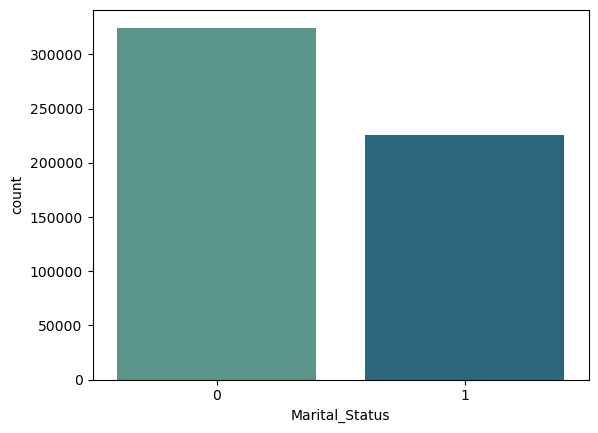

In [17]:
# Marital Status countplot
sns.countplot(x = "Marital_Status", data = walmart, palette = "crest")
plt.show()


**Comment -**

    Count of customers who are single are more than married customers.



---------------------------------------------------------------------------------------------------------------------------

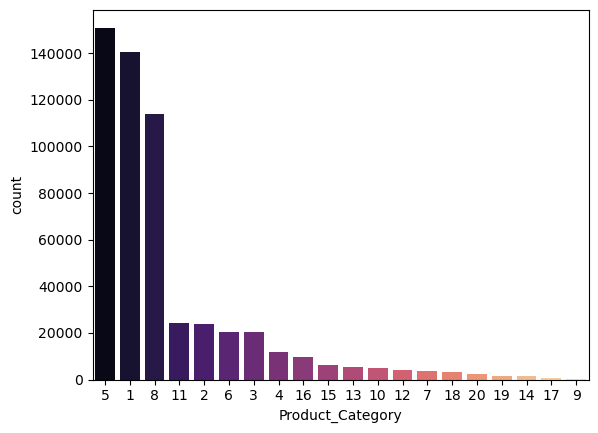

In [30]:
# Product category countplot
sns.countplot(x = "Product_Category", order = walmart["Product_Category"].value_counts().index, 
              data = walmart, palette = "magma")
plt.show()


**Comment -**

    Product category number 5, 1 and 8 are the top three with respect to count.



---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

**2. Histogram Plots -** 


In [44]:
walmart.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


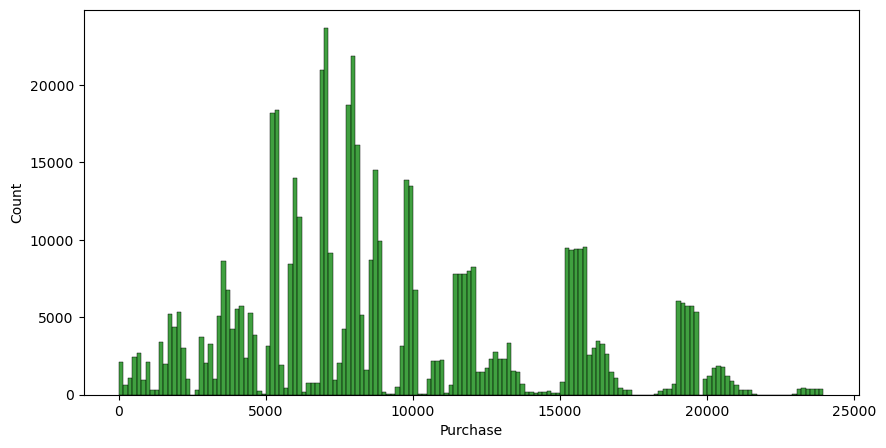

In [81]:
# Purchase Histogram Plot -
plt.figure(figsize = (10, 5))
sns.histplot(walmart["Purchase"], color = "g")
plt.show()


**Comment -**

    Purchase count is more in range 6k-8k roughly.



---------------------------------------------------------------------------------------------------------------------------

**3. Box Plots -**

    To detect whether outliers present or not 
    

In [48]:
walmart.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


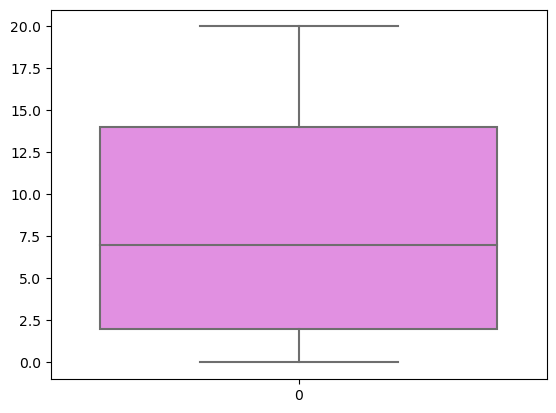

In [66]:
# Occupation Boxplot
sns.boxplot(data = walmart["Occupation"], orient = "v", color = "violet")
plt.show()


**Comment -**

    Outliers are not present.
    

---------------------------------------------------------------------------------------------------------------------------

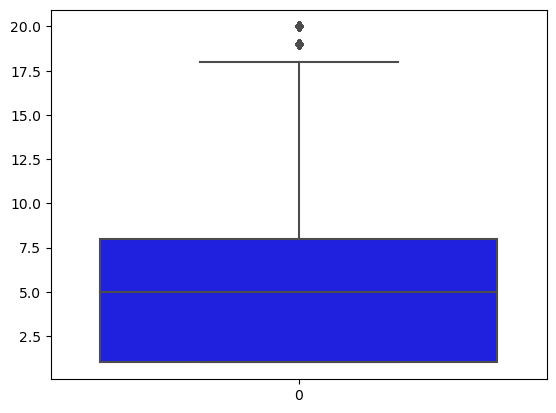

In [67]:
# Product Category Boxplot
sns.boxplot(data = walmart["Product_Category"], orient = "v", color = 'blue')
plt.show()


**Comment -**

    Outliers are present (i.e Product ID above 17)
    

---------------------------------------------------------------------------------------------------------------------------

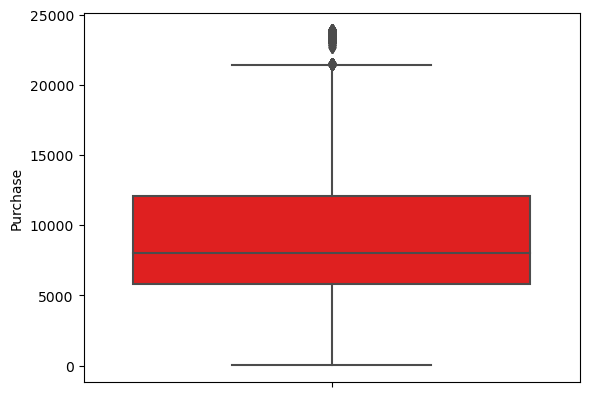

In [68]:
# Purchase Box Plot -
sns.boxplot(y = "Purchase", data = walmart, color = "r")
plt.show()


**Comment -**

    Outliers are present (i.e Purchase above nearly 21000.)
    

---------------------------------------------------------------------------------------------------------------------------

**B. Bivariate Analysis -**



**1. Histogram Plots -**



In [49]:
walmart.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


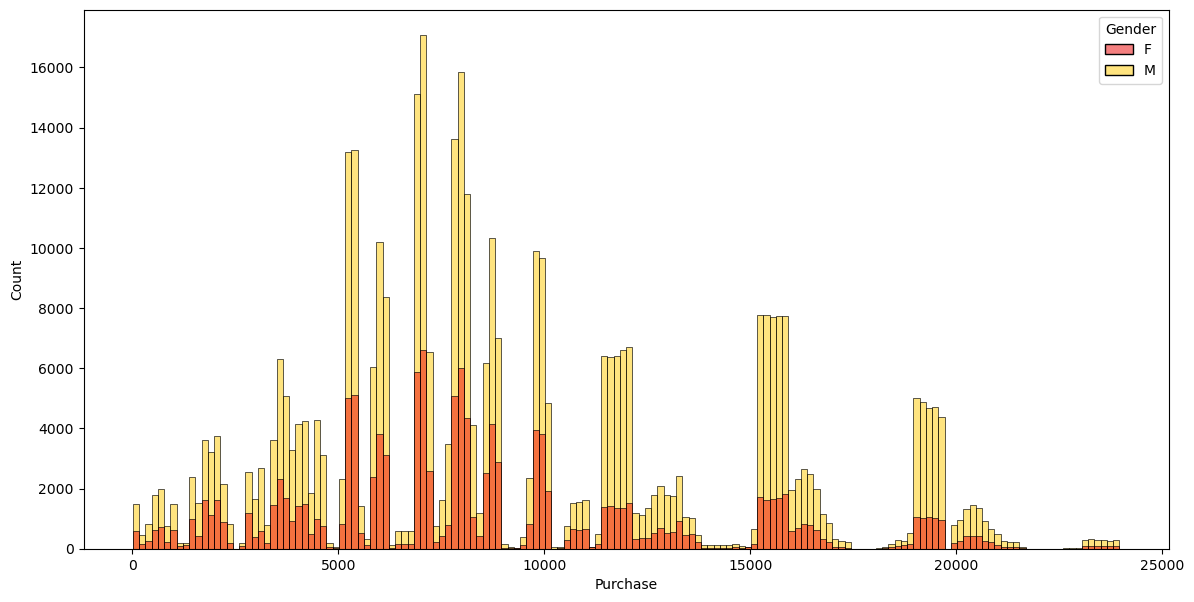

In [80]:
# Purchase with respect to gender -
plt.figure(figsize = (14, 7))
sns.histplot(x = "Purchase", data = walmart, hue = "Gender", palette = "hot")
plt.show()


**Comments -**

    Purchase percentage of male is more as compared to female.
    

---------------------------------------------------------------------------------------------------------------------------

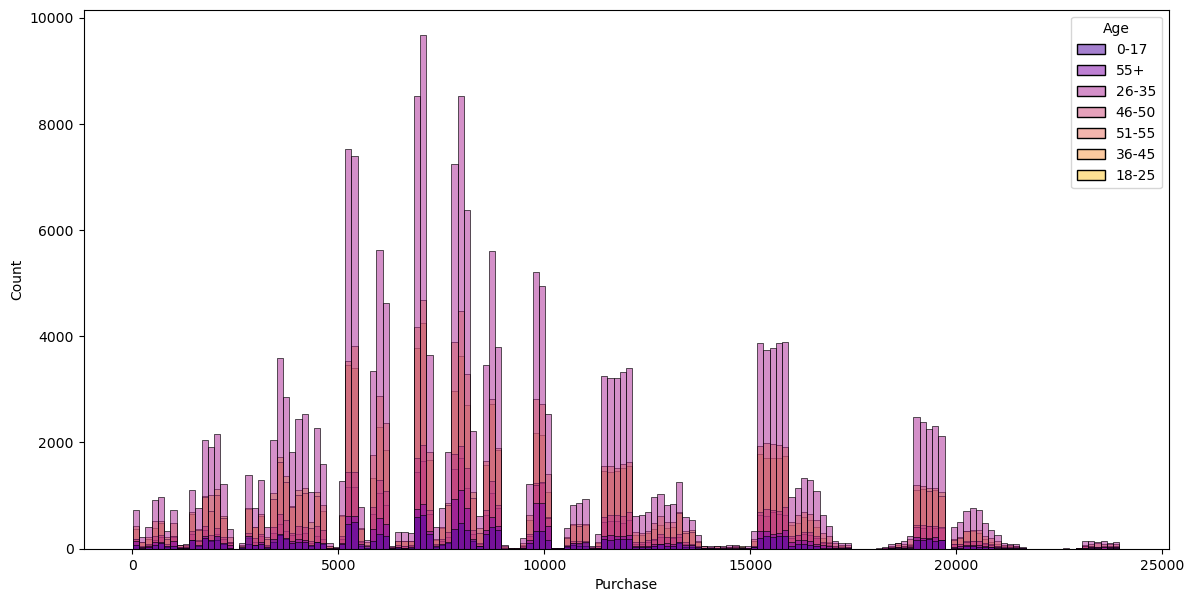

In [101]:
# Purchase with respect to Age -
plt.figure(figsize = (14, 7))
sns.histplot(x = "Purchase", data = walmart, hue = "Age", palette = "plasma")
plt.show()


**Comments -**

    Purchase w.r.t Age between 26-35 is most amongst all.
    

---------------------------------------------------------------------------------------------------------------------------

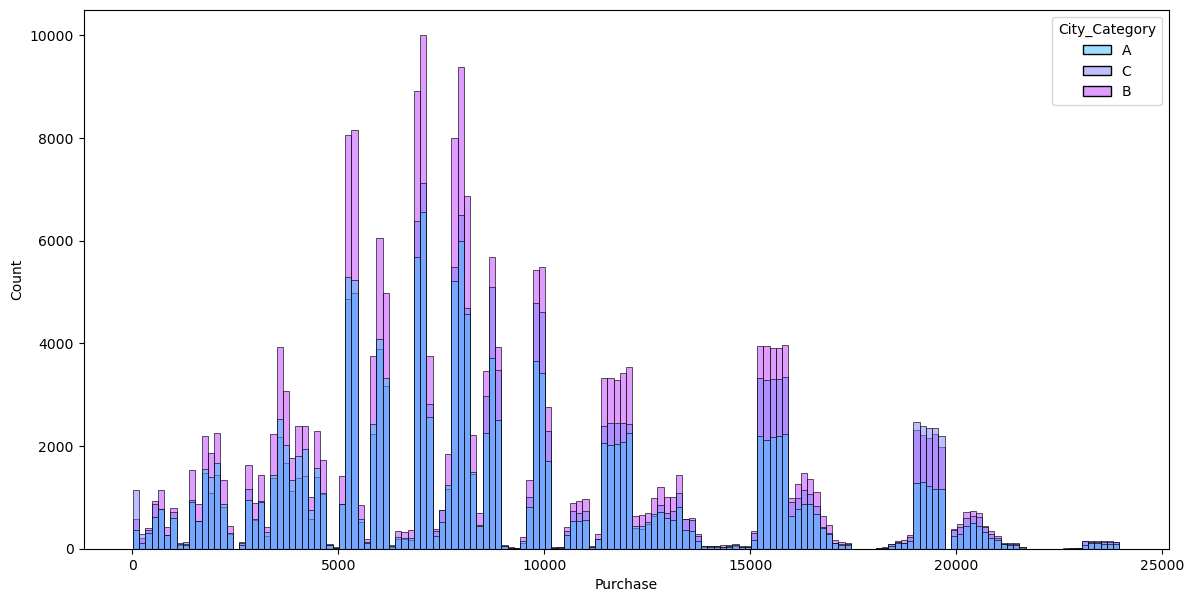

In [103]:
# Purchase with respect to City Category -
plt.figure(figsize = (14, 7))
sns.histplot(x = "Purchase", data = walmart, hue = "City_Category", palette = "cool")
plt.show()


**Comments -**

    Purchase from City category 'B' is more than individual city category 'A' & 'C'.
    

---------------------------------------------------------------------------------------------------------------------------

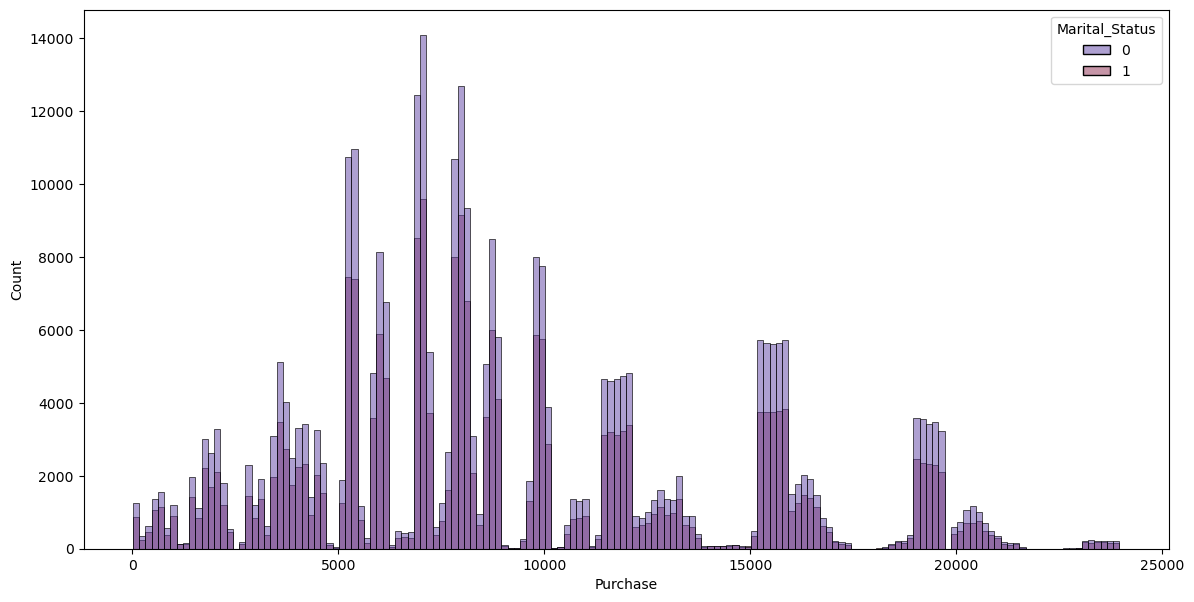

In [11]:
# Purchase with respect to Marital Status -
plt.figure(figsize = (14, 7))
sns.histplot(x = "Purchase", data = walmart, hue = "Marital_Status", palette = "twilight")
plt.show()


**Comments -**

    Single people have more tendency to purchase than married people.
    

---------------------------------------------------------------------------------------------------------------------------

**2. dis Plots -**


<Figure size 500x500 with 0 Axes>

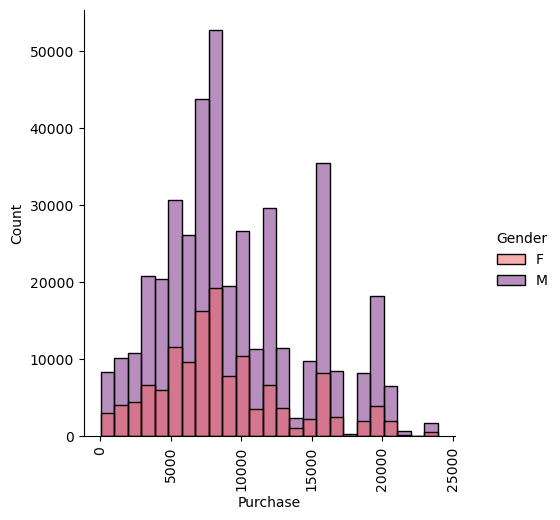

In [55]:
sns.displot(x = "Purchase", hue = "Gender", data = walmart, bins = 25, palette = "magma_r" )
plt.xticks( rotation = 90)
plt.show()


**Comments -**

    Males are purchasing more as compared to females.
    

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

**3. Box Plots -**


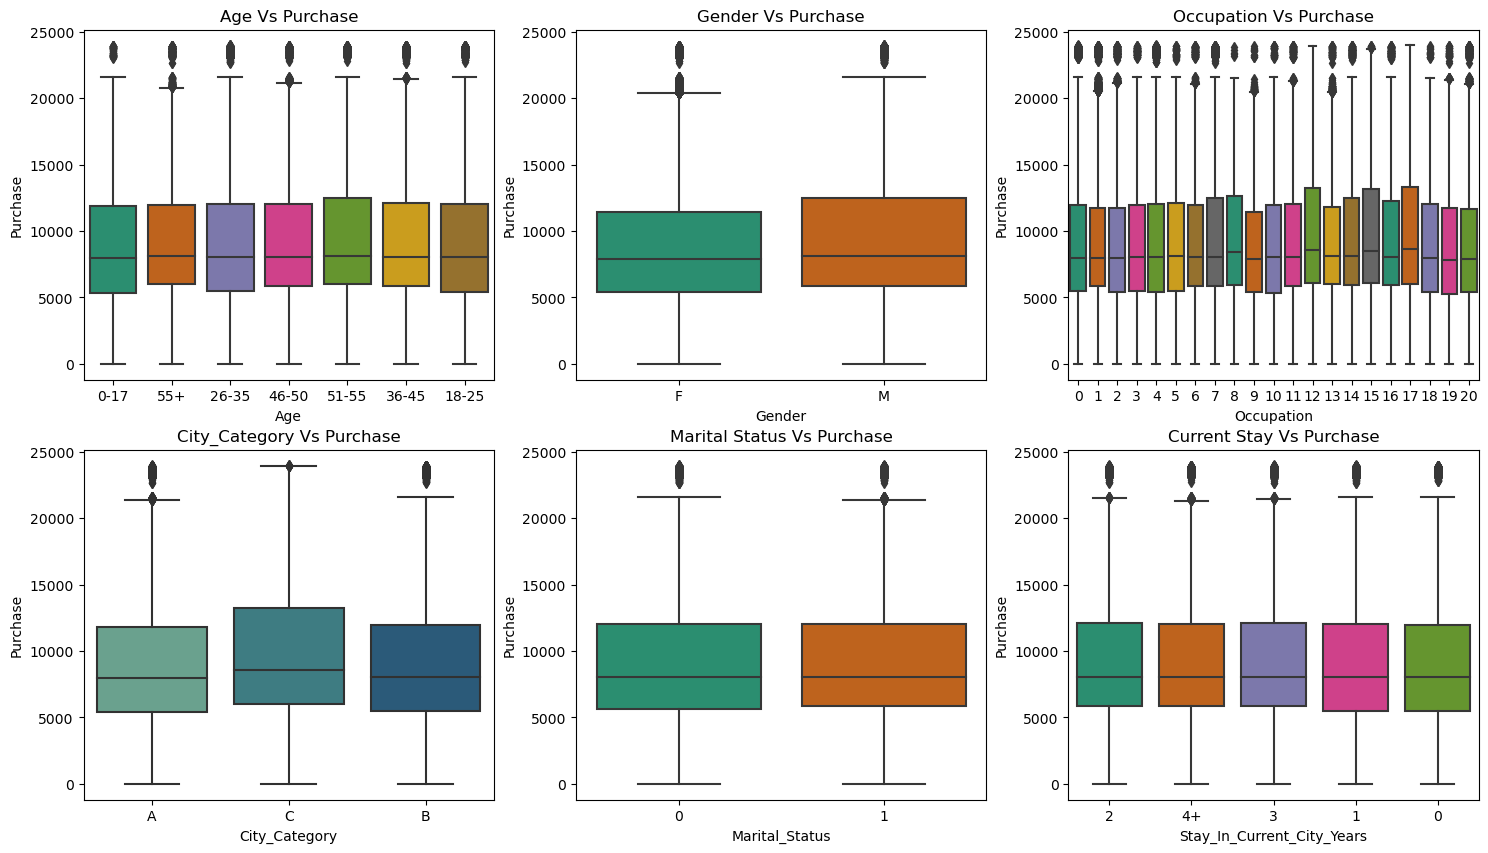

In [72]:
# Various Factors vs Purchase (Gender, Age, Occupation, City Category, Current city stay, Marital Status)

plt.figure(figsize = (18, 10))

plt.subplot(2, 3, 1)
sns.boxplot(x = "Age", y = "Purchase", data = walmart, palette = "Dark2")
plt.title("Age Vs Purchase", fontsize = 12)

plt.subplot(2, 3, 2)
sns.boxplot(x = "Gender", y = "Purchase", data = walmart, palette = "Dark2")
plt.title("Gender Vs Purchase", fontsize = 12)

plt.subplot(2, 3, 3)
sns.boxplot(x = "Occupation", y = "Purchase", data = walmart, palette = "Dark2")
plt.title("Occupation Vs Purchase", fontsize = 12)

plt.subplot(2, 3, 4)
sns.boxplot(x = "City_Category", y = "Purchase", data = walmart, palette = "crest")
plt.title("City_Category Vs Purchase", fontsize = 12)

plt.subplot(2, 3, 5)
sns.boxplot(x = "Marital_Status", y = "Purchase", data = walmart, palette = "Dark2")
plt.title("Marital Status Vs Purchase", fontsize = 12)

plt.subplot(2, 3, 6)
sns.boxplot(x = "Stay_In_Current_City_Years", y = "Purchase", data = walmart, palette = "Dark2")
plt.title("Current Stay Vs Purchase", fontsize = 12)

plt.show()


**Comments -**

    1) There is slight difference in the median purchase of male and female. (slightly higher for male)
    
    2) Median purchase of every age group is nearly similar.
    
    3) Median purchase of Occupational experience 12, 15 & 17 years are more amongst all.
    
    4) Median purchase for City Category 'C' is more than the rest City Category.
    
    5) Median purchase for all current city stay is nearly equal.
    
    6) Median purchase is almost equal for single and married people.
    
    
    
    

---------------------------------------------------------------------------------------------------------------------------

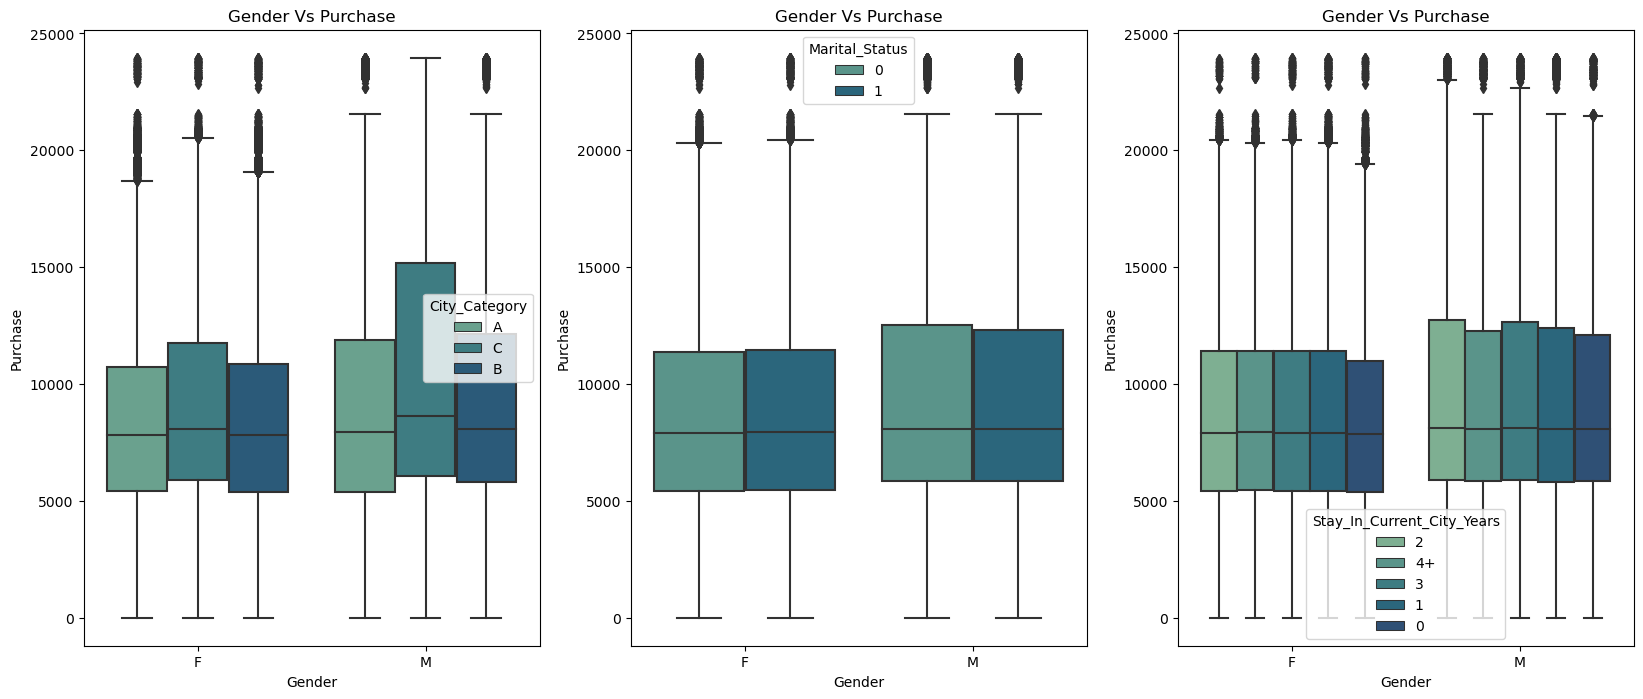

In [104]:
# Gender vs Purchase (With hue as City Category, Marital Status, Current city stay)

plt.figure(figsize = (20, 8))


plt.subplot(1, 3, 1)
sns.boxplot(data = walmart, x = "Gender", y = "Purchase", hue = "City_Category", palette = "crest")
plt.title("Gender Vs Purchase", fontsize = 12)


plt.subplot(1, 3, 2)
sns.boxplot(data = walmart, x = "Gender", y = "Purchase", hue = "Marital_Status", palette = "crest")
plt.title("Gender Vs Purchase", fontsize = 12)


plt.subplot(1, 3, 3)
sns.boxplot(data = walmart, x = "Gender", y = "Purchase", hue = "Stay_In_Current_City_Years", palette = "crest")
plt.title("Gender Vs Purchase", fontsize = 12)


plt.show()


**Comments -**

    1) In every cases such as marital status, city category & current stay city, 
       male customers are slightly more purchasing the product as compared to female customers.
    
    
    
    

---------------------------------------------------------------------------------------------------------------------------

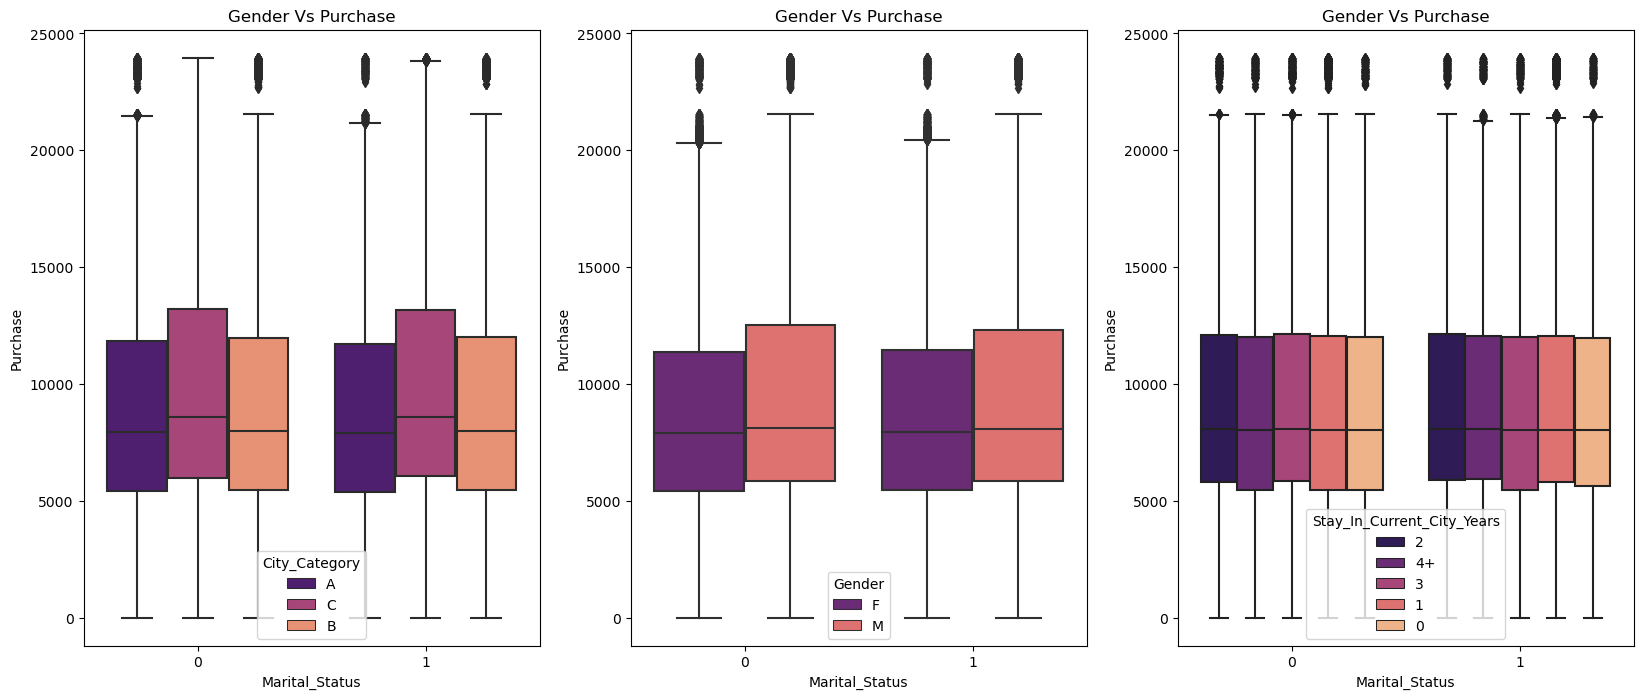

In [106]:
# Marital Status vs Purchase (With hue as City Category, Gender, Current city stay)

plt.figure(figsize = (20, 8))


plt.subplot(1, 3, 1)
sns.boxplot(data = walmart, x = "Marital_Status", y = "Purchase", hue = "City_Category", palette = "magma")
plt.title("Gender Vs Purchase", fontsize = 12)


plt.subplot(1, 3, 2)
sns.boxplot(data = walmart, x = "Marital_Status", y = "Purchase", hue = "Gender", palette = "magma")
plt.title("Gender Vs Purchase", fontsize = 12)


plt.subplot(1, 3, 3)
sns.boxplot(data = walmart, x = "Marital_Status", y = "Purchase", hue = "Stay_In_Current_City_Years", palette = "magma")
plt.title("Gender Vs Purchase", fontsize = 12)


plt.show()


**Comments -**

    1) Purchase amount for both single & partnered customers are nearly same.
    
    
    
    

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

**C. Multivariate Analysis -**

    To check correlation



**1. Pair Plots -**


<Figure size 1200x1000 with 0 Axes>

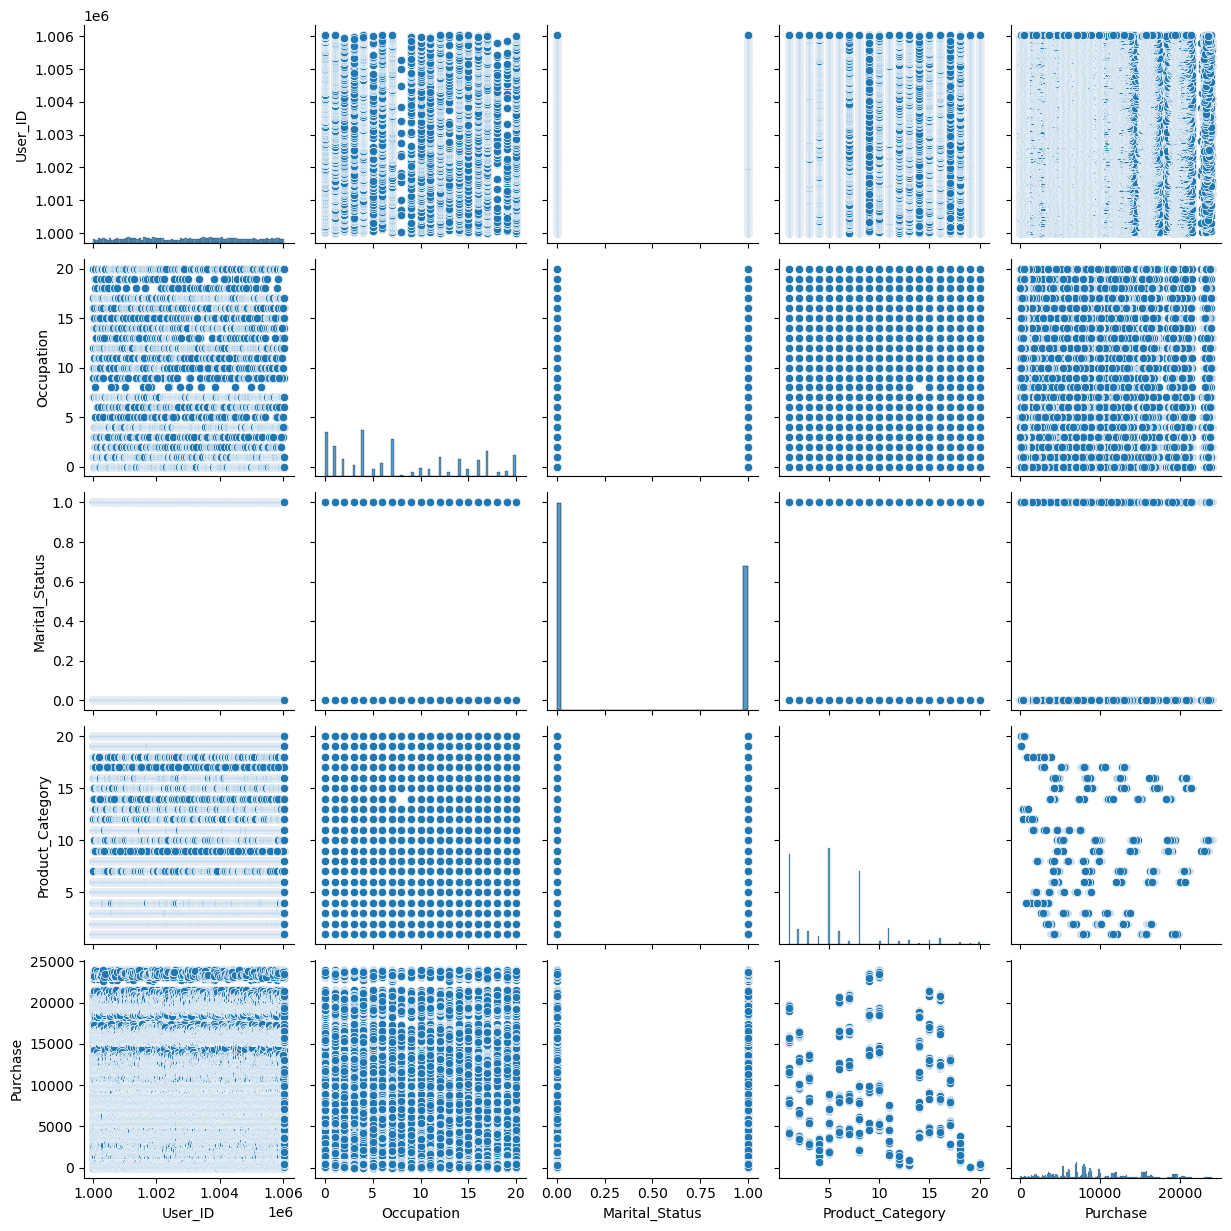

In [117]:
# Pair plots -
plt.figure(figsize = (12, 10))
sns.pairplot(walmart)
plt.show()


---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

**2. Correlation (Heatmaps) -**


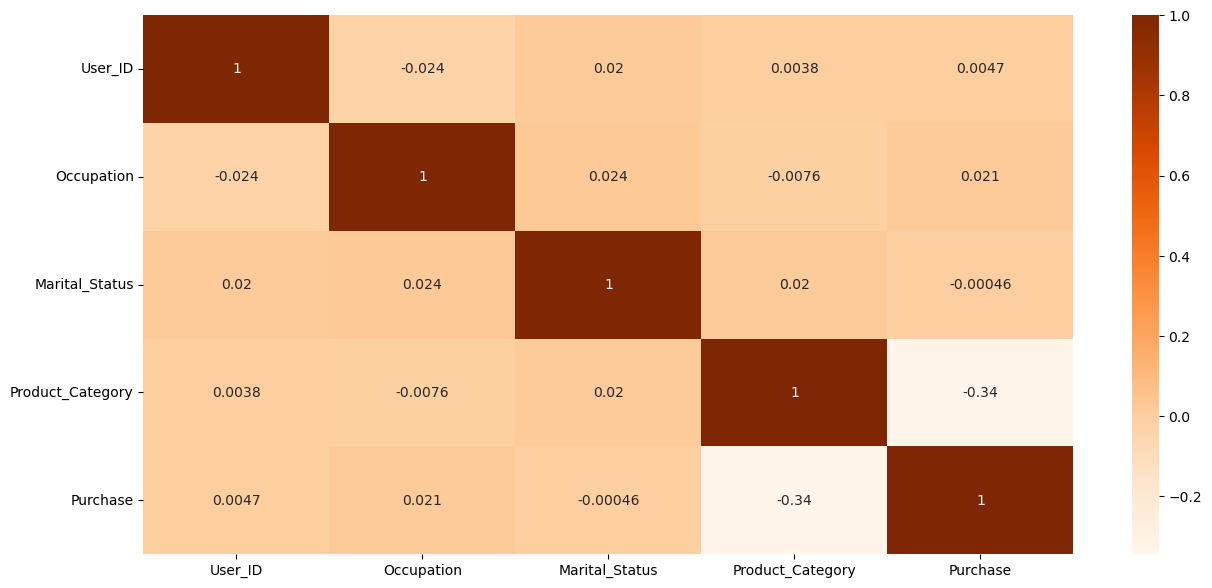

In [9]:
# Heatmaps -
plt.figure(figsize = (15, 7))
sns.heatmap(walmart.corr(), annot = True, cmap = "Oranges")
plt.show()


**Comments -**

    1) No positive or negative correlations can be seen from above pair plots & heatmaps.
    

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

**D. CLT & Confidence Interval Analysis -**


In [170]:
samp = walmart.sample(500)
samp


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
532105,1003933,P00003642,F,36-45,6,A,1,0,8,5906
476064,1001322,P00033942,M,55+,0,A,0,0,5,8716
442074,1001985,P00162442,M,46-50,12,A,2,1,1,15409
312615,1000166,P00058442,M,18-25,4,B,1,1,5,5321
467730,1000015,P00153742,M,26-35,7,A,1,0,8,6171
...,...,...,...,...,...,...,...,...,...,...
184294,1004422,P00122642,M,26-35,5,A,1,1,11,3182
16531,1002546,P00265742,F,55+,13,C,4+,0,5,5171
462056,1005124,P00270842,M,36-45,2,B,1,0,5,5291
303041,1004641,P00000742,M,26-35,7,C,1,0,5,1990


---------------------------------------------------------------------------------------------------------------------------

**Gender Analysis -**


In [249]:
# Overall Mean -
walmart[walmart["Gender"] == "M"]["Purchase"].mean()


9437.526040472265

In [250]:
# Overall Mean -
walmart[walmart["Gender"] == "F"]["Purchase"].mean() 


8734.565765155476

In [171]:
# Sample Statistical Properties -
samp.groupby("Gender")["Purchase"].describe()


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,127.0,8674.692913,4625.473981,136.0,5650.5,7886.0,10913.0,23711.0
M,373.0,9541.257373,5046.898625,26.0,5481.0,8111.0,12822.0,21412.0


In [172]:
male_samp_mean = [samp[samp["Gender"] == "M"].sample(5000, replace = True)["Purchase"].mean() for i in range(1000)]
male_samp_mean


[9453.7352,
 9480.9504,
 9557.2912,
 9486.1522,
 9495.7548,
 9605.7188,
 9445.6576,
 9499.529,
 9530.2892,
 9530.3016,
 9524.3388,
 9515.9612,
 9565.0358,
 9552.7132,
 9559.0084,
 9566.0034,
 9592.6308,
 9562.212,
 9464.1886,
 9695.7958,
 9563.7812,
 9504.5682,
 9643.6552,
 9629.6328,
 9498.3708,
 9515.634,
 9450.3086,
 9532.6076,
 9597.2216,
 9448.636,
 9576.369,
 9695.0894,
 9577.559,
 9678.6434,
 9572.8038,
 9569.683,
 9496.4764,
 9493.343,
 9592.5346,
 9397.9134,
 9415.9568,
 9449.449,
 9636.3822,
 9478.021,
 9472.7836,
 9623.221,
 9576.9646,
 9528.2716,
 9558.527,
 9539.4658,
 9502.432,
 9510.3214,
 9509.1806,
 9514.943,
 9409.7354,
 9488.1204,
 9632.1264,
 9427.7818,
 9539.3508,
 9415.2468,
 9610.9478,
 9572.649,
 9675.5108,
 9526.8198,
 9470.7764,
 9656.3274,
 9534.2224,
 9496.6348,
 9608.8422,
 9752.4476,
 9537.9832,
 9471.567,
 9631.0954,
 9692.5236,
 9536.9916,
 9499.4632,
 9515.6806,
 9582.3872,
 9442.708,
 9437.5092,
 9680.5858,
 9539.049,
 9561.4266,
 9379.4246,
 9454.4516

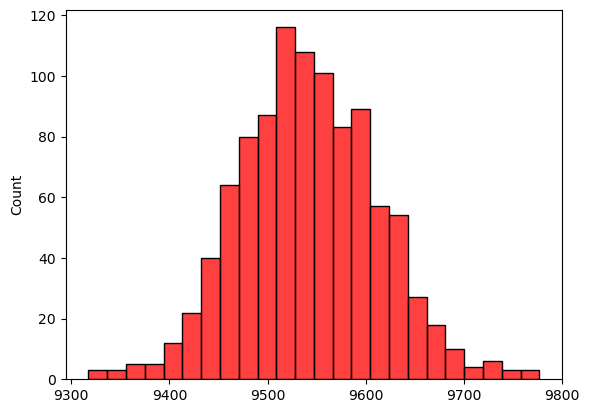

In [173]:
sns.histplot(male_samp_mean, color = "r")
plt.show()


In [174]:
female_samp_mean = [samp[samp["Gender"] == "F"].sample(5000, replace = True)["Purchase"].mean() for i in range(1000)]
female_samp_mean


[8714.3876,
 8730.894,
 8570.6982,
 8765.79,
 8616.1932,
 8641.109,
 8662.3442,
 8607.6916,
 8713.0782,
 8724.2124,
 8621.6164,
 8813.6914,
 8703.866,
 8696.0322,
 8706.6054,
 8668.0104,
 8778.483,
 8665.4966,
 8602.9416,
 8554.7336,
 8681.7914,
 8661.1334,
 8620.298,
 8592.5258,
 8652.6892,
 8735.2562,
 8761.4518,
 8821.9082,
 8800.2886,
 8628.562,
 8674.265,
 8701.9802,
 8648.5556,
 8673.2082,
 8739.0582,
 8685.3646,
 8576.0146,
 8657.669,
 8673.864,
 8553.5438,
 8656.3486,
 8779.6134,
 8553.1444,
 8705.9458,
 8661.0418,
 8733.586,
 8730.7856,
 8690.4402,
 8785.5228,
 8552.5272,
 8640.0604,
 8541.8606,
 8652.5494,
 8735.3878,
 8569.4332,
 8725.821,
 8675.5184,
 8728.1678,
 8592.8972,
 8672.8226,
 8710.6878,
 8720.2064,
 8581.975,
 8662.2632,
 8622.4836,
 8672.902,
 8773.3802,
 8669.856,
 8672.2486,
 8622.5298,
 8784.772,
 8782.5844,
 8697.081,
 8746.7608,
 8578.2324,
 8651.7068,
 8670.6208,
 8685.4656,
 8756.2658,
 8804.8892,
 8702.46,
 8653.7206,
 8748.5798,
 8747.0116,
 8540.0556,


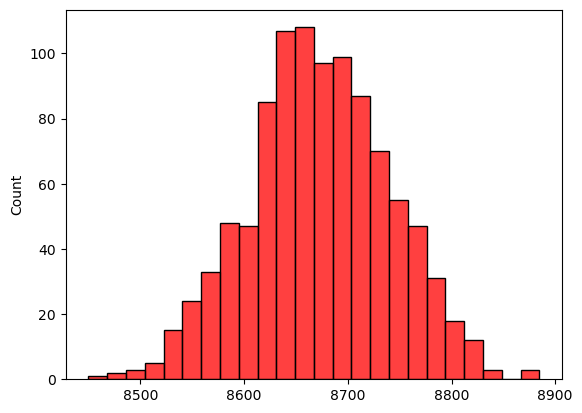

In [175]:
sns.histplot(female_samp_mean, color = "r")
plt.show()


---------------------------------------------------------------------------------------------------------------------------

In [176]:
# Std deviation of male sample
np.std(male_samp_mean).round(3)


70.638

In [177]:
# Std deviation of female sample
np.std(female_samp_mean).round(3)


67.819

---------------------------------------------------------------------------------------------------------------------------

**CI - 90%**


In [178]:
# Confidence Interval of male = 90%
male_low = np.mean(male_samp_mean) + norm.ppf(0.05) * (np.std(male_samp_mean))
male_high = np.mean(male_samp_mean) + norm.ppf(0.95) * (np.std(male_samp_mean))

male_low.round(3), male_high.round(3)


(9425.723, 9658.103)

In [179]:
# Confidence Interval of female = 90%
female_low = np.mean(female_samp_mean) + norm.ppf(0.05) * (np.std(female_samp_mean))
female_high = np.mean(female_samp_mean) + norm.ppf(0.95) * (np.std(female_samp_mean))

female_low.round(3), female_high.round(3)


(8561.541, 8784.644)

In [180]:
# To check overlapping of Confidence Intervals
male_CI = np.percentile(male_samp_mean, [5, 95])
female_CI = np.percentile(female_samp_mean, [5, 95])

male_CI.round(3), female_CI.round(3)


(array([9432.646, 9657.692]), array([8558.499, 8784.787]))

**Comments -**

    1) From above result, for 90% CI - it is clear that confidence intervals of male 
       & female average purchases are not overlapping.
       

---------------------------------------------------------------------------------------------------------------------------

**CI - 95%**


In [181]:
# Confidence Interval of male = 95%
male_low = np.mean(male_samp_mean) + norm.ppf(0.025) * (np.std(male_samp_mean))
male_high = np.mean(male_samp_mean) + norm.ppf(0.975) * (np.std(male_samp_mean))

male_low.round(3), male_high.round(3)


(9403.464, 9680.362)

In [182]:
# Confidence Interval of female = 95%
female_low = np.mean(female_samp_mean) + norm.ppf(0.025) * (np.std(female_samp_mean))
female_high = np.mean(female_samp_mean) + norm.ppf(0.975) * (np.std(female_samp_mean))

female_low.round(3), female_high.round(3)


(8540.17, 8806.014)

In [183]:
# To check overlapping of Confidence Intervals
male_CI = np.percentile(male_samp_mean, [2.5, 97.5])
female_CI = np.percentile(female_samp_mean, [2.5, 97.5])

male_CI.round(3), female_CI.round(3)


(array([9409.384, 9681.547]), array([8540.053, 8803.344]))

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

**Comments -**

    1) From above result, for 95% CI - it is clear that confidence intervals of male 
       & female average purchases are not overlapping.
       

---------------------------------------------------------------------------------------------------------------------------

**CI - 99%**


In [184]:
# Confidence Interval of male = 99%
male_low = np.mean(male_samp_mean) + norm.ppf(0.005) * (np.std(male_samp_mean))
male_high = np.mean(male_samp_mean) + norm.ppf(0.995) * (np.std(male_samp_mean))

male_low.round(3), male_high.round(3)


(9359.96, 9723.866)

In [185]:
# Confidence Interval of female = 95%
female_low = np.mean(female_samp_mean) + norm.ppf(0.005) * (np.std(female_samp_mean))
female_high = np.mean(female_samp_mean) + norm.ppf(0.995) * (np.std(female_samp_mean))

female_low.round(3), female_high.round(3)


(8498.403, 8847.781)

In [186]:
# To check overlapping of Confidence Intervals
male_CI = np.percentile(male_samp_mean, [0.5, 99.5])
female_CI = np.percentile(female_samp_mean, [0.5, 99.5])

male_CI.round(3), female_CI.round(3)


(array([9351.381, 9741.974]), array([8496.908, 8830.957]))

**Comments -**

    1) From above result, for 99% CI - it is clear that confidence intervals of male 
       & female average purchases are not overlapping.
       

**Inferences from Gender CI Analysis -**

    1) For males 90% CI of means = [9432.646, 9657.692]  & For females = [8558.499, 8784.787]
    
    2) For males 95% CI of means = [9409.384, 9681.547]  & For females = [8540.053, 8803.344]
    
    3) For males 99% CI of means = [9351.381, 9741.974]  & For females = [8496.908, 8830.957]
    
    4) From above analysis males are purchasing more with different condifence intervals as compared to females.
    
    

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

**Marital Status Analysis -**


In [266]:
samp2 = walmart.sample(500)
samp2


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
313212,1000263,P00033942,F,26-35,7,C,1,0,5,7187
264788,1004767,P00279542,F,36-45,9,C,2,1,8,7998
233562,1006016,P00271542,M,46-50,1,B,1,1,18,1642
173219,1002807,P00127442,F,36-45,11,B,2,1,1,7743
15244,1002270,P00210042,M,18-25,1,C,3,1,8,6196
...,...,...,...,...,...,...,...,...,...,...
484113,1002583,P00112442,M,36-45,7,C,4+,0,6,20220
319308,1001211,P00113942,M,18-25,4,A,1,0,8,9912
209648,1002258,P00342742,F,18-25,4,B,4+,0,8,7945
289667,1002648,P00122542,M,26-35,17,B,2,0,11,7532


In [251]:
# Overall Mean -
walmart[walmart["Marital_Status"] == 0]["Purchase"].mean()


9265.907618921507

In [252]:
# Overall Mean -
walmart[walmart["Marital_Status"] == 1]["Purchase"].mean()


9261.174574082374

In [267]:
# Sample Statistical Properties -
samp2.groupby("Marital_Status")["Purchase"].describe()


,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,278.0,9159.546763,4998.563605,13.0,5439.00,7938.5,11978.75,20858.0
1,222.0,9147.927928,5058.726926,255.0,5467.75,7991.5,12018.75,23913.0


In [268]:
unmarried_samp2_mean = [samp2[samp2["Marital_Status"] == 0].sample(5000, replace = True)["Purchase"].mean() 
                     for i in range(1000)]
unmarried_samp2_mean


[9165.7086,
 9157.4682,
 9230.8508,
 9239.2224,
 9270.6582,
 9192.9536,
 9064.2044,
 9061.072,
 9199.9114,
 9124.5532,
 9224.7172,
 9068.8224,
 9197.8042,
 9177.2416,
 9188.9712,
 9198.7698,
 9179.3462,
 9233.2162,
 9085.61,
 9173.7708,
 9166.4424,
 9091.6626,
 9086.5608,
 9246.4758,
 9142.0578,
 9289.7872,
 9285.7616,
 9118.6294,
 9154.2448,
 9293.692,
 9273.918,
 9168.9928,
 9257.8922,
 9141.6716,
 9226.8466,
 9142.604,
 9100.1538,
 9121.9306,
 9116.4404,
 9201.1754,
 9072.4904,
 9107.8028,
 9204.8904,
 9371.708,
 9260.4232,
 9178.046,
 9081.2702,
 9050.9204,
 9064.9846,
 9059.6168,
 9028.9892,
 9205.7182,
 9089.673,
 9183.1696,
 9204.751,
 9092.8686,
 9182.357,
 9228.1498,
 9117.9918,
 9110.8492,
 9132.929,
 9224.7098,
 9125.6388,
 9015.2138,
 9056.135,
 9101.6038,
 9136.8162,
 9212.1098,
 9112.171,
 9202.1602,
 9056.3918,
 9149.2432,
 9021.3824,
 9110.9446,
 9202.8578,
 9135.7742,
 9162.6764,
 9175.5386,
 9250.2244,
 9268.3874,
 9171.4904,
 9096.703,
 9182.4842,
 9197.18,
 9085.028

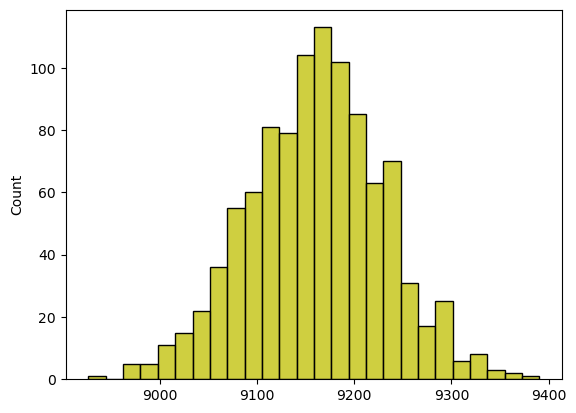

In [269]:
sns.histplot(unmarried_samp2_mean, color = "y")
plt.show()


In [270]:
married_samp2_mean = [samp2[samp2["Marital_Status"] == 1].sample(5000, replace = True)["Purchase"].mean() 
                      for i in range(1000)]
married_samp2_mean


[9127.5108,
 9056.7708,
 9006.528,
 9186.0584,
 9216.7454,
 9146.155,
 9109.1838,
 9167.749,
 9118.2642,
 9128.8524,
 9146.404,
 9093.677,
 9302.1178,
 9104.7872,
 9211.5758,
 9150.0648,
 9077.7268,
 8983.7322,
 9075.797,
 8985.4328,
 9076.3868,
 9194.4258,
 9039.2394,
 9121.5528,
 9186.6456,
 9231.2632,
 9195.7956,
 9266.5876,
 9132.2922,
 9130.589,
 9335.207,
 9182.1348,
 9227.1888,
 9096.49,
 9132.1928,
 9124.0568,
 9195.7252,
 9067.6858,
 9125.2462,
 9224.6546,
 8966.8196,
 9172.1706,
 9009.143,
 8995.2642,
 9242.0428,
 9159.8386,
 9079.8608,
 9101.8644,
 9157.0344,
 9052.9646,
 9136.1448,
 9221.0272,
 9128.2656,
 9104.6106,
 9090.816,
 9134.585,
 9115.8766,
 9216.6806,
 9187.9612,
 9180.4232,
 9068.1668,
 9144.386,
 9147.8772,
 9254.0238,
 9085.5768,
 9199.534,
 9189.606,
 9143.184,
 9164.15,
 9237.1262,
 9040.5878,
 9132.341,
 9228.6642,
 9320.941,
 9194.632,
 9177.7212,
 9110.325,
 9169.6332,
 9191.7356,
 9214.9272,
 9170.7774,
 9248.8614,
 9076.0158,
 9132.4622,
 9120.5596,
 91

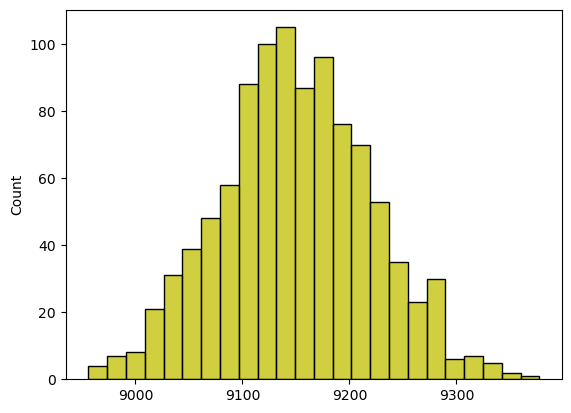

In [271]:
sns.histplot(married_samp2_mean, color = "y")
plt.show()


In [272]:
# Std deviation of single sample
np.std(unmarried_samp2_mean).round(3)


69.814

In [273]:
# Std deviation of married sample
np.std(married_samp2_mean).round(3)


70.377

---------------------------------------------------------------------------------------------------------------------------

**CI - 90%**


In [274]:
# Confidence Interval of singles = 90%
unmarried_low = np.mean(unmarried_samp2_mean) + norm.ppf(0.05) * (np.std(unmarried_samp2_mean))
unmarried_high = np.mean(unmarried_samp2_mean) + norm.ppf(0.95) * (np.std(unmarried_samp2_mean))

unmarried_low.round(3), unmarried_high.round(3)


(9045.959, 9275.627)

In [275]:
# Confidence Interval of married = 90%
married_low = np.mean(married_samp2_mean) + norm.ppf(0.05) * (np.std(married_samp2_mean))
married_high = np.mean(married_samp2_mean) + norm.ppf(0.95) * (np.std(married_samp2_mean))

married_low.round(3), married_high.round(3)


(9034.253, 9265.775)

In [276]:
# To check overlapping of Confidence Intervals
unmarried_CI = np.percentile(unmarried_samp2_mean, [5, 95])
married_CI = np.percentile(married_samp2_mean, [5, 95])

unmarried_CI.round(3), married_CI.round(3)


(array([9045.793, 9278.103]), array([9033.226, 9272.255]))

**Comments -**

    1) From above result, for 90% CI - it is clear that confidence intervals of unmarried 
       & married people average purchases are overlapping.
       

---------------------------------------------------------------------------------------------------------------------------

**CI - 95%**


In [277]:
# Confidence Interval of singles = 95%
unmarried_low = np.mean(unmarried_samp2_mean) + norm.ppf(0.025) * (np.std(unmarried_samp2_mean))
unmarried_high = np.mean(unmarried_samp2_mean) + norm.ppf(0.975) * (np.std(unmarried_samp2_mean))

unmarried_low.round(3), unmarried_high.round(3)


(9023.959, 9297.626)

In [278]:
# Confidence Interval of married = 95%
married_low = np.mean(married_samp2_mean) + norm.ppf(0.025) * (np.std(married_samp2_mean))
married_high = np.mean(married_samp2_mean) + norm.ppf(0.975) * (np.std(married_samp2_mean))

married_low.round(3), married_high.round(3)


(9012.077, 9287.951)

In [279]:
# To check overlapping of Confidence Intervals
unmarried_CI = np.percentile(unmarried_samp2_mean, [2.5, 97.5])
married_CI = np.percentile(married_samp2_mean, [2.5, 97.5])

unmarried_CI.round(3), married_CI.round(3)


(array([9022.526, 9295.976]), array([9013.041, 9284.673]))

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

**Comments -**

    1) From above result, for 95% CI - it is clear that confidence intervals of unmarried 
       & married people average purchases are overlapping.
       

---------------------------------------------------------------------------------------------------------------------------

**CI - 99%**


In [280]:
# Confidence Interval of singles = 9%
unmarried_low = np.mean(unmarried_samp2_mean) + norm.ppf(0.005) * (np.std(unmarried_samp2_mean))
unmarried_high = np.mean(unmarried_samp2_mean) + norm.ppf(0.995) * (np.std(unmarried_samp2_mean))

unmarried_low.round(3), unmarried_high.round(3)


(8980.963, 9340.622)

In [281]:
# Confidence Interval of married = 99%
married_low = np.mean(married_samp2_mean) + norm.ppf(0.005) * (np.std(married_samp2_mean))
married_high = np.mean(married_samp2_mean) + norm.ppf(0.995) * (np.std(married_samp2_mean))

married_low.round(3), married_high.round(3)


(8968.734, 9331.294)

In [282]:
# To check overlapping of Confidence Intervals
unmarried_CI = np.percentile(unmarried_samp2_mean, [0.5, 99.5])
married_CI = np.percentile(married_samp2_mean, [0.5, 99.5])

unmarried_CI.round(3), married_CI.round(3)


(array([8979.564, 9339.626]), array([8975.618, 9328.881]))

**Comments -**

    1) From above result, for 99% CI - it is clear that confidence intervals of unmarried 
       & married people average purchases are overlapping.
       

**Inferences from Marital Status CI Analysis -**

    1) For unmarried customers 90% CI of means = [9045.793, 9278.103]  & For married customers = [9033.226, 9272.255]
    
    2) For unmarried customers 95% CI of means = [9022.526, 9295.976]  & For married customers = [9013.041, 9284.673]
    
    3) For unmarried customers 99% CI of means = [8979.564, 9339.626]  & For married customers = [8975.618, 9328.881]
    
    
    

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

**Age Analysis -**


In [301]:
age_samp = walmart.sample(500)
age_samp


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
528375,1003444,P00015142,M,51-55,14,C,1,1,5,5395
184764,1004482,P00057442,F,36-45,1,A,1,0,5,3456
500526,1005077,P00209842,M,26-35,2,A,0,0,5,5284
267129,1005138,P00058042,M,26-35,17,B,0,0,8,7810
34061,1005252,P00111442,M,26-35,20,B,0,0,8,8078
...,...,...,...,...,...,...,...,...,...,...
504940,1005785,P00035242,F,26-35,7,B,2,1,8,8071
298492,1003965,P00361642,M,18-25,11,C,3,0,5,8747
432440,1000583,P00216042,F,26-35,0,A,4+,0,5,6896
23491,1003665,P00112642,M,26-35,0,A,2,0,1,15312


In [253]:
# Overall Mean -
walmart[walmart["Age"] == "0-17"]["Purchase"].mean()


8933.464640444974

In [254]:
# Overall Mean -
walmart[walmart["Age"] == "18-25"]["Purchase"].mean()


9169.663606261289

In [255]:
# Overall Mean -
walmart[walmart["Age"] == "26-35"]["Purchase"].mean()


9252.690632869888

In [256]:
# Overall Mean -
walmart[walmart["Age"] == "36-45"]["Purchase"].mean()


9331.350694917874

In [257]:
# Overall Mean -
walmart[walmart["Age"] == "46-50"]["Purchase"].mean()


9208.625697468327

In [258]:
# Overall Mean -
walmart[walmart["Age"] == "51-55"]["Purchase"].mean()


9534.808030960236

In [259]:
# Overall Mean -
walmart[walmart["Age"] == "55+"]["Purchase"].mean()


9336.280459449405

In [302]:
# Sample Statistical Properties -
age_samp.groupby("Age")["Purchase"].describe()


,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15.0,8898.533333,6026.540619,1529.0,4410.0,7081.0,11657.50,20414.0
18-25,96.0,8883.260417,5661.943284,61.0,5017.0,7019.5,12696.00,20956.0
26-35,195.0,8978.620513,4618.301763,13.0,5404.5,7980.0,11863.50,21083.0
36-45,94.0,9384.234043,5194.972827,25.0,5344.0,8685.5,12541.50,20686.0
46-50,42.0,8941.309524,4560.425806,1376.0,5649.0,8046.0,12019.25,19158.0
51-55,41.0,10115.463415,4917.037894,3608.0,6003.0,8698.0,13160.00,20211.0
55+,17.0,12195.294118,5834.943506,2838.0,7767.0,11716.0,15591.00,23312.0


---------------------------------------------------------------------------------------------------------------------------

In [303]:
mean_age_0_17 = [age_samp[age_samp["Age"] == "0-17"].sample(5000, replace = True)["Purchase"].mean() 
                     for i in range(1000)]
mean_age_0_17


[8900.1492,
 8881.2372,
 8914.243,
 8982.1326,
 8966.5526,
 8876.8558,
 8830.6172,
 8896.1148,
 8801.5554,
 8812.9602,
 8768.0784,
 8814.5658,
 8795.6156,
 8940.4424,
 8880.3282,
 8990.6618,
 8880.1194,
 8898.9556,
 8819.6046,
 8961.0194,
 8997.3454,
 8836.3312,
 8789.5282,
 8868.749,
 8991.184,
 8906.3598,
 9000.177,
 8976.3106,
 8895.3166,
 8889.1002,
 8862.9122,
 8882.9362,
 8858.8452,
 8943.633,
 8876.1672,
 8966.599,
 8987.3586,
 9010.6582,
 8842.9382,
 8854.3966,
 8827.1776,
 8990.132,
 8980.9004,
 9010.7836,
 8811.9464,
 8801.0454,
 8986.5482,
 8984.6074,
 8905.7524,
 8868.41,
 8876.5194,
 8894.8144,
 8778.4798,
 8806.3792,
 9007.5442,
 8827.0194,
 8912.9154,
 8891.8736,
 8897.7422,
 8918.5936,
 8881.9436,
 8811.0854,
 8846.5028,
 8908.382,
 8950.664,
 8884.8016,
 8814.9324,
 8965.373,
 8785.5722,
 8827.4922,
 8890.8768,
 8964.0652,
 8983.8428,
 8895.5528,
 8823.004,
 8985.9716,
 8869.4236,
 9095.651,
 9006.344,
 8885.7478,
 8943.9118,
 8829.957,
 8859.303,
 8898.3296,
 8736.614

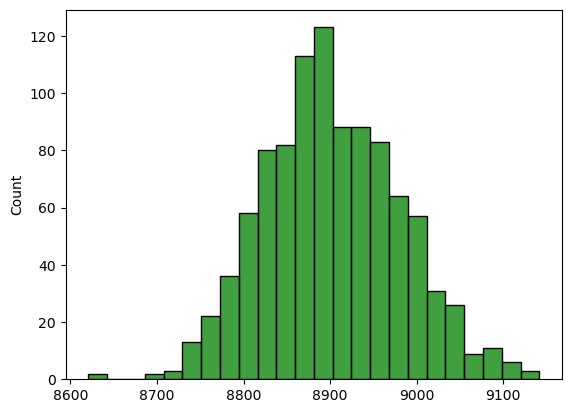

In [304]:
sns.histplot(mean_age_0_17, color = "g")
plt.show()


In [305]:
mean_age_18_25 = [age_samp[age_samp["Age"] == "18-25"].sample(5000, replace = True)["Purchase"].mean() 
                     for i in range(1000)]
mean_age_18_25


[8783.6568,
 8884.429,
 8908.6336,
 8836.921,
 8938.3126,
 8879.8776,
 8927.3664,
 8927.1472,
 8944.6228,
 8874.2932,
 8968.4694,
 8863.9808,
 8952.2904,
 8788.7356,
 8865.4196,
 8824.1262,
 8814.8706,
 8907.2488,
 8871.1446,
 8878.8706,
 8770.4206,
 8935.3468,
 9002.811,
 9042.3632,
 8874.5802,
 8880.5606,
 8749.788,
 8827.4096,
 8871.8124,
 8889.4932,
 9014.213,
 8867.157,
 8736.976,
 8935.85,
 8907.8804,
 8830.0024,
 8836.528,
 8788.7636,
 8872.9858,
 8894.352,
 8860.0384,
 8797.3918,
 8830.6908,
 8826.2194,
 8830.8442,
 8973.8712,
 8935.8722,
 8903.9478,
 9028.3418,
 8862.0278,
 9030.2302,
 8744.241,
 8941.8034,
 9042.3374,
 8834.9822,
 8930.1392,
 8787.181,
 8967.8678,
 8989.3334,
 8911.1732,
 8922.912,
 8829.0114,
 8814.336,
 9003.4604,
 8871.1086,
 8775.2948,
 8921.9446,
 8847.5156,
 8758.892,
 8780.7766,
 8996.9284,
 8824.8466,
 8928.6586,
 8955.031,
 8863.0858,
 8906.3198,
 8969.0416,
 8861.6194,
 8829.3072,
 8803.6172,
 8887.9958,
 8998.1102,
 8816.8894,
 8877.3682,
 8849.313

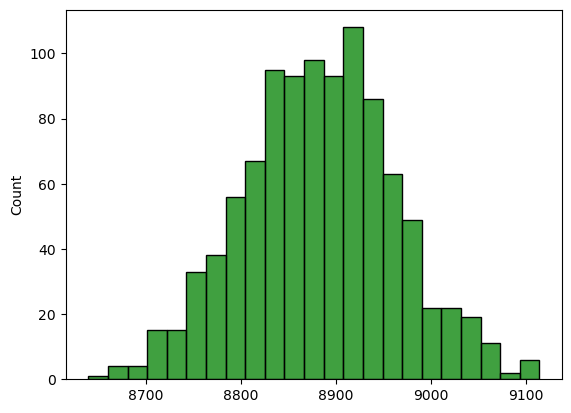

In [306]:
sns.histplot(mean_age_18_25, color = "g")
plt.show()


In [307]:
mean_age_26_35 = [age_samp[age_samp["Age"] == "26-35"].sample(5000, replace = True)["Purchase"].mean() 
                     for i in range(1000)]
mean_age_26_35


[8975.3888,
 8962.9068,
 8981.672,
 8987.003,
 8997.3786,
 9041.8496,
 8965.4922,
 9030.8074,
 8945.7062,
 8989.0096,
 9008.759,
 8945.7452,
 9037.7436,
 9061.877,
 9071.0542,
 8898.7442,
 8996.4422,
 9075.6158,
 9094.5938,
 8959.2734,
 8951.4038,
 8946.3002,
 8958.945,
 8982.8966,
 8999.9932,
 8907.6534,
 8982.187,
 8896.3138,
 8927.5638,
 9134.632,
 8897.4482,
 9005.4348,
 8951.7712,
 8923.8964,
 8997.739,
 9007.4552,
 8994.5116,
 8867.9788,
 9019.8922,
 8965.7824,
 9017.2472,
 9013.487,
 9074.3444,
 9060.2904,
 8950.0462,
 8894.5092,
 8925.5022,
 9015.1532,
 9011.6158,
 9036.8656,
 8986.6022,
 8983.626,
 9085.7246,
 8944.9858,
 9000.7484,
 8961.771,
 8963.3704,
 9016.1504,
 9067.025,
 8941.1752,
 9026.5932,
 8982.19,
 8948.856,
 9061.4576,
 8860.9066,
 8895.8356,
 9099.0074,
 8997.355,
 9029.6616,
 8930.6036,
 9017.1076,
 8979.436,
 8989.3584,
 9019.7894,
 8923.0482,
 8937.361,
 9100.7624,
 9027.0022,
 9057.7332,
 8947.3984,
 9025.834,
 8965.4886,
 9062.2024,
 8875.1182,
 9129.152,


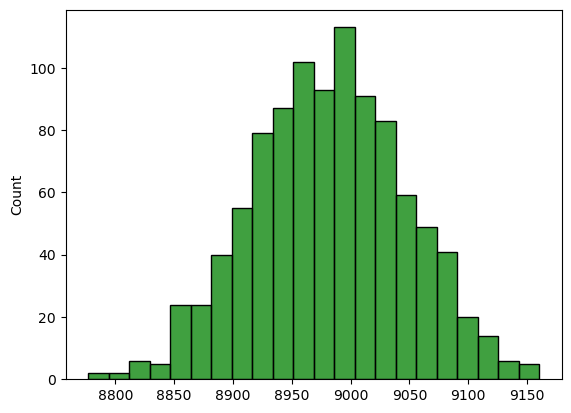

In [308]:
sns.histplot(mean_age_26_35, color = "g")
plt.show()


In [309]:
mean_age_36_45 = [age_samp[age_samp["Age"] == "36-45"].sample(5000, replace = True)["Purchase"].mean() 
                     for i in range(1000)]
mean_age_36_45


[9413.201,
 9464.0072,
 9226.1832,
 9422.6706,
 9311.2394,
 9547.2746,
 9384.3704,
 9372.503,
 9385.5956,
 9314.8206,
 9418.3248,
 9264.6878,
 9338.1922,
 9363.0438,
 9460.6776,
 9445.9398,
 9398.2698,
 9408.271,
 9346.3502,
 9398.0428,
 9449.41,
 9487.4298,
 9380.7406,
 9463.2918,
 9297.6318,
 9462.6926,
 9341.5006,
 9381.5172,
 9465.223,
 9330.4346,
 9496.7502,
 9422.1728,
 9398.225,
 9477.2692,
 9376.4768,
 9497.766,
 9495.6584,
 9364.2096,
 9438.1318,
 9428.6288,
 9450.7162,
 9442.7724,
 9195.599,
 9365.7994,
 9509.4566,
 9453.8906,
 9387.124,
 9339.3872,
 9354.8338,
 9252.6324,
 9467.3024,
 9381.3362,
 9377.8346,
 9433.2734,
 9337.5308,
 9375.758,
 9300.8648,
 9396.1496,
 9282.7338,
 9418.9702,
 9303.928,
 9387.3958,
 9361.6678,
 9426.077,
 9550.4502,
 9392.892,
 9375.3306,
 9317.9054,
 9333.0914,
 9330.9278,
 9249.7224,
 9442.8872,
 9273.8896,
 9329.0676,
 9472.7482,
 9376.1258,
 9443.2092,
 9388.1372,
 9165.3026,
 9329.7746,
 9361.1944,
 9415.6812,
 9300.1054,
 9350.4106,
 9284.

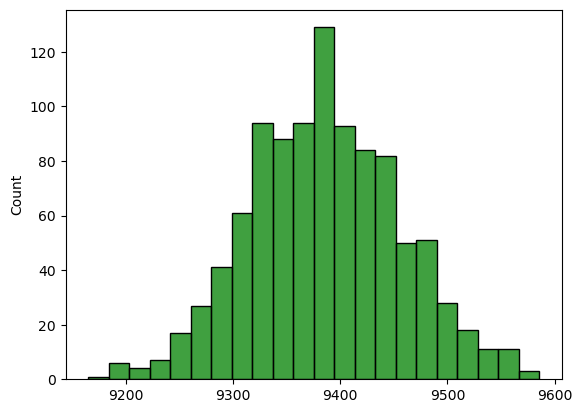

In [310]:
sns.histplot(mean_age_36_45, color = "g")
plt.show()


In [311]:
mean_age_46_50 = [age_samp[age_samp["Age"] == "46-50"].sample(5000, replace = True)["Purchase"].mean() 
                     for i in range(1000)]
mean_age_46_50


[8931.0834,
 8915.3128,
 8823.9972,
 8948.5912,
 9030.1574,
 8848.5528,
 8925.79,
 9003.4078,
 8829.583,
 8970.5752,
 8996.267,
 8906.1242,
 8801.4652,
 9024.145,
 8905.4516,
 8938.6012,
 8891.3258,
 9051.8178,
 8965.0264,
 8937.7276,
 8974.3758,
 8867.1482,
 9053.8812,
 9004.714,
 8974.0024,
 9110.9058,
 8927.6018,
 8888.4264,
 8841.4318,
 8997.7468,
 8913.2112,
 8891.3134,
 9063.5456,
 9121.9188,
 9007.1294,
 8921.0186,
 8871.2536,
 8829.6794,
 8925.3248,
 8926.3722,
 8867.485,
 8979.7994,
 9004.0558,
 8876.5672,
 8818.8276,
 9048.0432,
 9098.5206,
 8952.348,
 8951.4172,
 8853.469,
 8798.0428,
 8761.5176,
 8878.3658,
 8840.874,
 8923.2284,
 8915.7548,
 8992.6434,
 8937.1978,
 8860.1406,
 8989.3306,
 8947.664,
 8845.2966,
 8865.6534,
 8852.4256,
 8974.962,
 8941.7046,
 9019.6764,
 8924.6606,
 8956.0554,
 8900.1058,
 8984.2592,
 9002.7242,
 8928.7396,
 8951.4492,
 8858.904,
 8948.6116,
 8955.0334,
 8932.4768,
 8880.0296,
 8861.324,
 8968.969,
 9037.026,
 8947.9024,
 8894.8366,
 8828.57

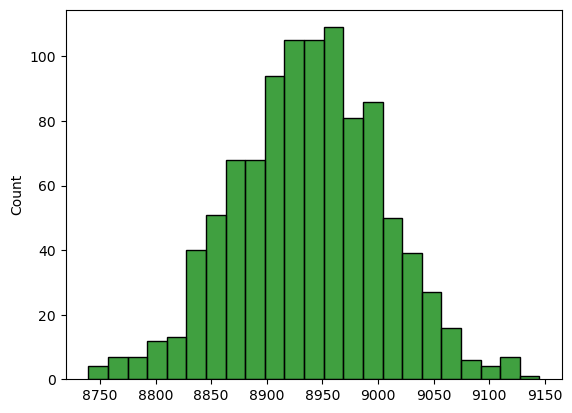

In [312]:
sns.histplot(mean_age_46_50, color = "g")
plt.show()


In [313]:
mean_age_51_55 = [age_samp[age_samp["Age"] == "51-55"].sample(5000, replace = True)["Purchase"].mean() 
                     for i in range(1000)]
mean_age_51_55


[10183.1968,
 10189.938,
 10145.44,
 10140.9444,
 10069.5946,
 10015.7408,
 10178.887,
 10172.3566,
 10114.0418,
 10083.0896,
 10093.7562,
 10278.5398,
 10042.2012,
 10072.5338,
 10061.7496,
 10030.856,
 9988.5952,
 10125.6342,
 10144.419,
 10113.67,
 10076.3224,
 10103.8078,
 10029.7152,
 10075.2628,
 10126.013,
 10124.5236,
 10275.5708,
 10117.8286,
 10165.0012,
 10086.722,
 10180.6056,
 10078.0516,
 10078.4046,
 10126.0774,
 10123.7414,
 10064.7966,
 10099.459,
 10179.3942,
 10004.089,
 10146.9144,
 10098.9394,
 10191.4226,
 10188.7502,
 10083.6604,
 10055.7556,
 10000.927,
 10119.0016,
 9994.1784,
 10202.0148,
 10152.0132,
 10079.0294,
 10084.8008,
 10131.709,
 9958.8408,
 10212.8744,
 9987.5662,
 10012.0418,
 10104.979,
 10197.3898,
 10093.7742,
 10152.1106,
 10053.7794,
 10081.2666,
 10182.4746,
 10118.172,
 10127.309,
 9939.611,
 10235.7936,
 10186.2986,
 10083.0926,
 10075.3176,
 10227.864,
 10045.2244,
 10279.6728,
 10299.132,
 10049.3434,
 10154.3966,
 10137.2748,
 10147.2224

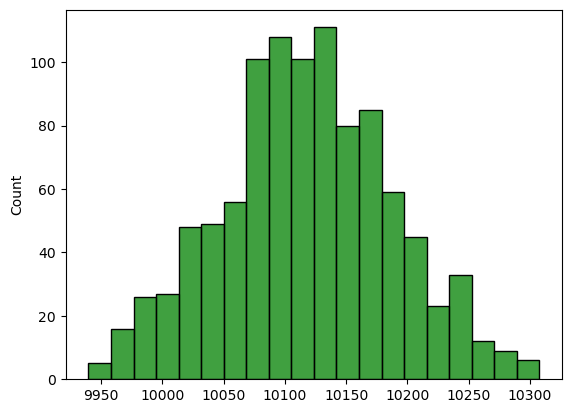

In [315]:
sns.histplot(mean_age_51_55, color = "g")
plt.show()


In [316]:
mean_age_above_55 = [age_samp[age_samp["Age"] == "55+"].sample(5000, replace = True)["Purchase"].mean() 
                     for i in range(1000)]
mean_age_above_55


[12193.0092,
 12289.7854,
 12249.2818,
 12213.1298,
 12290.2314,
 12170.3826,
 12260.7606,
 12159.4004,
 12092.3106,
 12235.2798,
 12107.4124,
 12193.9938,
 12262.4932,
 12189.0514,
 12308.3434,
 12138.281,
 12171.6924,
 12253.042,
 12307.4064,
 12210.7516,
 12238.6444,
 12085.5936,
 12114.496,
 12107.563,
 12132.6926,
 12233.5916,
 12212.0472,
 12166.1532,
 12264.2504,
 12201.3198,
 12163.5352,
 12251.3378,
 12243.3888,
 12284.4398,
 12252.3262,
 12141.9662,
 12110.462,
 12157.238,
 12328.2102,
 12198.0952,
 12154.9986,
 12047.3478,
 12233.0638,
 12301.8364,
 12154.032,
 12302.2862,
 12105.4688,
 12226.8602,
 12243.3036,
 12119.4556,
 12227.0718,
 12199.7942,
 12186.9438,
 12346.4564,
 12257.4284,
 12138.6876,
 12228.0782,
 12246.6844,
 12231.9504,
 12164.4252,
 12199.0826,
 12143.4056,
 12331.6948,
 12090.9938,
 11968.692,
 12175.3428,
 12164.6612,
 12167.5586,
 12097.8394,
 12290.427,
 12260.413,
 12192.6614,
 12198.4132,
 12077.5592,
 12063.4756,
 12193.8506,
 12200.3332,
 12157.47

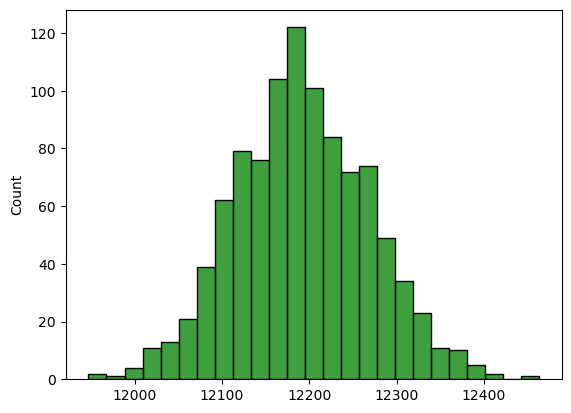

In [317]:
sns.histplot(mean_age_above_55, color = "g")
plt.show()


---------------------------------------------------------------------------------------------------------------------------

In [318]:
# Std deviation of age sample (0-17)
np.std(mean_age_0_17).round(3)


79.199

In [319]:
# Std deviation of age sample (18-25)
np.std(mean_age_18_25).round(3)


79.772

In [320]:
# Std deviation of age sample (26-35)
np.std(mean_age_26_35).round(3)


64.836

In [321]:
# Std deviation of age sample (36-45)
np.std(mean_age_36_45).round(3)


70.195

In [323]:
# Std deviation of age sample (46-50)
np.std(mean_age_46_50).round(3)


66.369

In [324]:
# Std deviation of age sample (51-55)
np.std(mean_age_51_55).round(3)


69.915

In [325]:
# Std deviation of age sample (55+)
np.std(mean_age_above_55).round(3)


77.228

---------------------------------------------------------------------------------------------------------------------------

**CI - 95%**


In [326]:
# Confidence Interval of age(0-17) = 95%
age_0_17_low = np.mean(mean_age_0_17) + norm.ppf(0.025) * (np.std(mean_age_0_17))
age_0_17_high = np.mean(mean_age_0_17) + norm.ppf(0.975) * (np.std(mean_age_0_17))

age_0_17_low.round(3), age_0_17_high.round(3)


(8747.006, 9057.462)

In [327]:
# Confidence Interval of age(18-25) = 95%
age_18_25_low = np.mean(mean_age_18_25) + norm.ppf(0.025) * (np.std(mean_age_18_25))
age_18_25_high = np.mean(mean_age_18_25) + norm.ppf(0.975) * (np.std(mean_age_18_25))

age_18_25_low.round(3), age_18_25_high.round(3)


(8726.329, 9039.028)

In [328]:
# Confidence Interval of age(26-35) = 95%
age_26_35_low = np.mean(mean_age_26_35) + norm.ppf(0.025) * (np.std(mean_age_26_35))
age_26_35_high = np.mean(mean_age_26_35) + norm.ppf(0.975) * (np.std(mean_age_26_35))

age_26_35_low.round(3), age_26_35_high.round(3)


(8854.695, 9108.846)

In [329]:
# Confidence Interval of age(36-45) = 95%
age_36_45_low = np.mean(mean_age_36_45) + norm.ppf(0.025) * (np.std(mean_age_36_45))
age_36_45_high = np.mean(mean_age_36_45) + norm.ppf(0.975) * (np.std(mean_age_36_45))

age_36_45_low.round(3), age_36_45_high.round(3)


(9247.872, 9523.032)

In [330]:
# Confidence Interval of age(46-50) = 95%
age_46_50_low = np.mean(mean_age_46_50) + norm.ppf(0.025) * (np.std(mean_age_46_50))
age_46_50_high = np.mean(mean_age_46_50) + norm.ppf(0.975) * (np.std(mean_age_46_50))

age_46_50_low.round(3), age_46_50_high.round(3)


(8807.378, 9067.538)

In [331]:
# Confidence Interval of age(51-55) = 95%
age_51_55_low = np.mean(mean_age_51_55) + norm.ppf(0.025) * (np.std(mean_age_51_55))
age_51_55_high = np.mean(mean_age_51_55) + norm.ppf(0.975) * (np.std(mean_age_51_55))

age_51_55_low.round(3), age_51_55_high.round(3)


(9980.274, 10254.336)

In [332]:
# Confidence Interval of age(55+) = 95%
age_above_55_low = np.mean(mean_age_above_55) + norm.ppf(0.025) * (np.std(mean_age_above_55))
age_above_55_high = np.mean(mean_age_above_55) + norm.ppf(0.975) * (np.std(mean_age_above_55))

age_above_55_low.round(3), age_above_55_high.round(3)


(12040.384, 12343.113)

---------------------------------------------------------------------------------------------------------------------------

In [333]:
# To check overlapping of Confidence Intervals
age_0_17_CI = np.percentile(mean_age_0_17, [2.5, 97.5])
age_18_25_CI = np.percentile(mean_age_18_25, [2.5, 97.5])
age_26_35_CI = np.percentile(mean_age_26_35, [2.5, 97.5])
age_36_45_CI = np.percentile(mean_age_36_45, [2.5, 97.5])
age_46_50_CI = np.percentile(mean_age_46_50, [2.5, 97.5])
age_51_55_CI = np.percentile(mean_age_51_55, [2.5, 97.5])
age_above_55_CI = np.percentile(mean_age_above_55, [2.5, 97.5])

print("For age 00-17 --> confidence interval of means:" , age_0_17_CI.round(3))
print("For age 18-25 --> confidence interval of means:" , age_18_25_CI.round(3))
print("For age 26-35 --> confidence interval of means:" , age_26_35_CI.round(3))
print("For age 36-45 --> confidence interval of means:" , age_36_45_CI.round(3))
print("For age 46-50 --> confidence interval of means:" , age_46_50_CI.round(3))
print("For age 51-55 --> confidence interval of means:" , age_51_55_CI.round(3))
print("For age 56-++ --> confidence interval of means:" , age_above_55_CI.round(3))



For age 00-17 --> confidence interval of means: [8756.562 9063.367]
For age 18-25 --> confidence interval of means: [8722.235 9042.338]
For age 26-35 --> confidence interval of means: [8856.464 9106.515]
For age 36-45 --> confidence interval of means: [9253.03  9528.198]
For age 46-50 --> confidence interval of means: [8801.653 9062.294]
For age 51-55 --> confidence interval of means: [ 9978.492 10252.66 ]
For age 56-++ --> confidence interval of means: [12042.322 12346.487]


**Comments -**    
    
        1) The confidence interval range is overlapping for some age bins 
           while for some age bins it is not overlapping.

---------------------------------------------------------------------------------------------------------------------------

**Insights from Data-**



    1) 59% Single, 41% Married.
    
    2) 75% of the users are Male and 25% are Female.
      
    3) nearly 80% of the users are between the age 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45).
    
    4) Total of 20 product categories are there.
    
    5) There are 20 differnent types of occupations in the city.
    
    6) Customers mostly from city B(42%) followed by city C(31%) & then city A(27%).
    
    7) 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years.
    
    8) From CLT graphs we have noticed that -
    
        a. for gender samples, the confidence interval range was not overlapping.
        
        b. for marital status samples, the confidence interval range was overlapping.
        
        c. for Age samples, the confidence interval range was overlapping for some age bins 
           while for some age bins it was not overlapping
        
    



---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

**Recommendations -**

    1) Unmarried customers spend more money than married customers, 
       So in order to increase sales from married customers, 
       walmart should give some discounts offers for married people .
       
       
    2) As males are purchasing more as compared to females, walmart should retain the male customer.
       Also walmart should think to grow sales from female perspective like giving them some discounts 
       or do advertise about the product to attract female customer base.
       
          
    3) Customers in the age group of 18-25 are the favourable age range for the business,
       so walmart should retain these customers.
       Also for the age group which is less purchasing than the above mentioned age group, walmart should come up with
       some ideas to involve those age groups in order to increase the sales.
    
    
    4) Walmart have strong customer base in 'City C', so walmart should retain these customers,
       Also walmart should think to change strategies in 'City B' & 'City A' in order to increase the sales 
       in those cities as well.
       Walmart can do advertising using online flatforms such as social digital flatforms such as Youtube, Instagram.
       
       
    5) There are some product categories such as 1, 5, 8 & 11 which are purchased by most of the customers.
       So, walmart can focus on the product categories other than this so that the sales from all other categories
       would be increase at some sufficient level.
    
    
    
    
    
    
    

---------------------------------------------------------------------------------------------------------------------------